In [7]:
import sys
!{sys.executable} -m pip install tensorflow

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

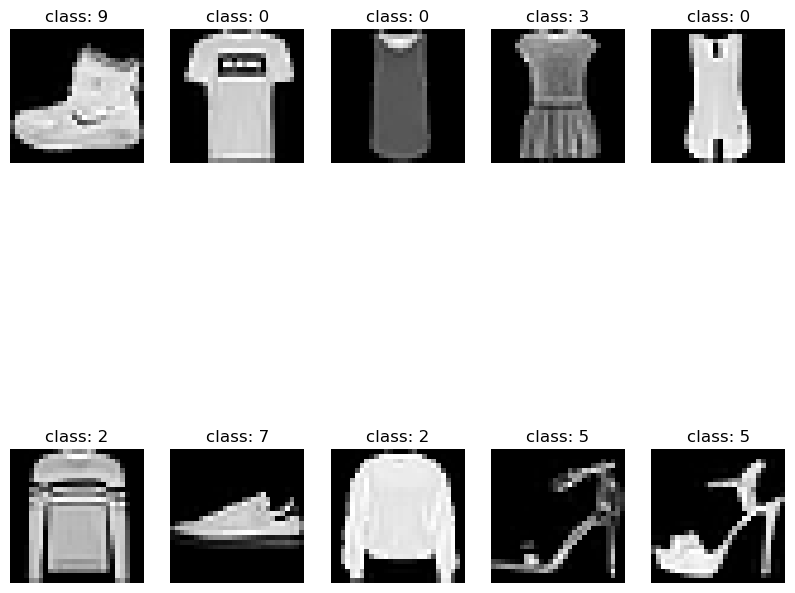

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(f"class: {y_train[i]}")
plt.show()

In [19]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\faika\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.0001)

callbacks = [early_stop, reduce_lr]

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step - accuracy: 0.7778 - loss: 0.6203 - val_accuracy: 0.8455 - val_loss: 0.4156 - learning_rate: 0.0010
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.8696 - loss: 0.3628 - val_accuracy: 0.8639 - val_loss: 0.3762 - learning_rate: 0.0010
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - accuracy: 0.8789 - loss: 0.3227 - val_accuracy: 0.8665 - val_loss: 0.3675 - learning_rate: 0.0010
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.8876 - loss: 0.3001 - val_accuracy: 0.8632 - val_loss: 0.3741 - learning_rate: 0.0010
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.8944 - loss: 0.2860 - val_accuracy: 0.8791 - val_loss: 0.3398 - learning_rate: 0.0010
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.8999 - loss: 0.2638 - val_accuracy: 0.8708 - val_loss: 0.3605 - learning_rate: 0.0010
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.9050 - l

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 705,440 (2.69 MB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 470,294 (1.79 MB)

In [27]:
model.save('fashion_mnist_modelll.keras')

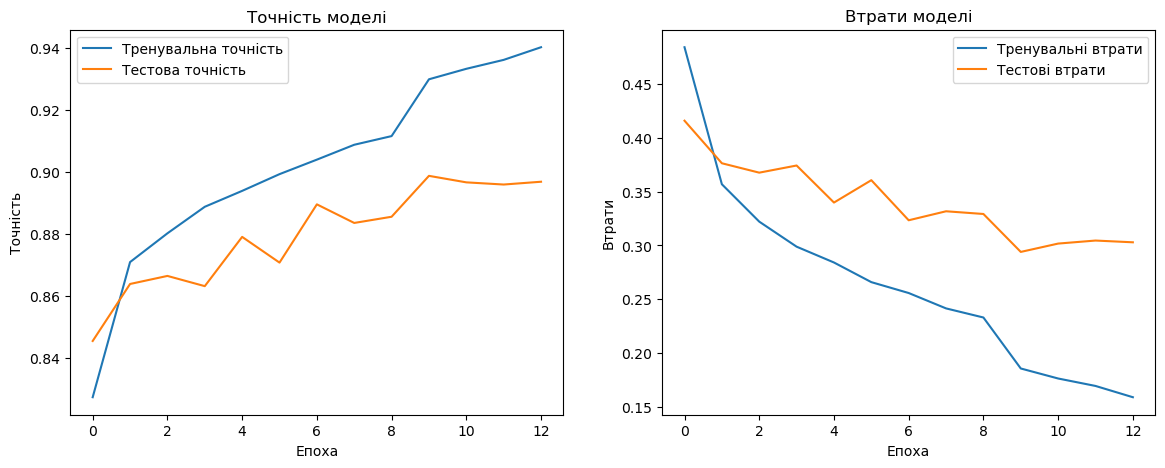

In [33]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Тестова точність')
plt.title('Точність моделі')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Тренувальні втрати')
plt.plot(history.history['val_loss'], label='Тестові втрати')
plt.title('Втрати моделі')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.show()

In [35]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.81      0.83      0.82      1000
           3       0.90      0.89      0.90      1000
           4       0.82      0.82      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.73      0.72      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



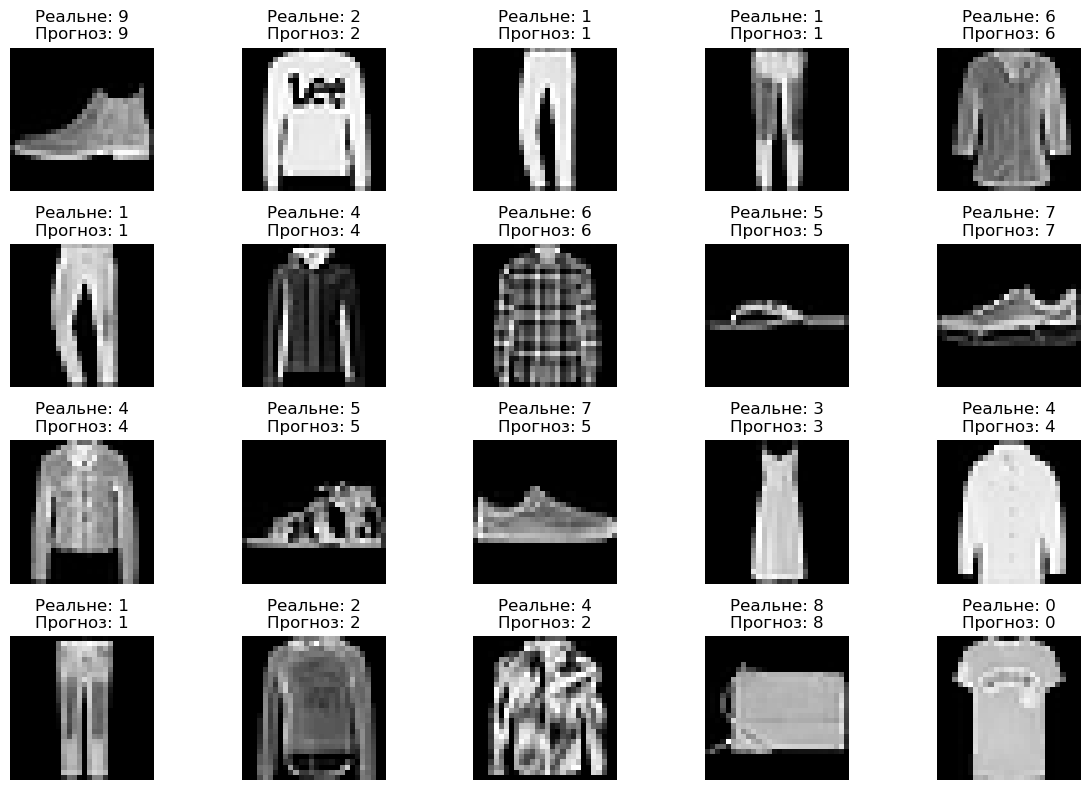

In [39]:
num_rows = 4
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(12, 8))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Реальне: {y_test[i]}\nПрогноз: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()